# Sales analysis

- Load libraries and read the data
- Making and renaming new columns
- Visualizing Missing Values
- Finding Duplicates
- Exploratory Data Analysis
   - visualizing distribution
   - visualizing outliers
- Correlation Heatmap
- Working with categorical variables
- Sales anayis
   - sales analysis based on month,days
   - products analysis 
   - analysis by countries
   - customer analysis
   - operating division analysi
- Feature importance
    - mutual information
    - random forest feature importance

   

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
plt.style.use("fivethirtyeight")

In [2]:
#setting display
pd.set_option("display.max.columns", None)

In [3]:
#importing excel file
df=pd.read_excel("dataset.xlsx")

In [4]:
#ten samples of rows 
df.sample(10)

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
98366,543164,AMMONIUM BICARBONATE,22588,AMMONIUM BICARBONATE,H5A,2,2011-02-03 19:32,2.89,Brenntag Schweizerha,13208,Agriculture,South Korea,KR,Distributor yes,MONOMERS,CM,5.78,February,Thursday
196862,556021,MELAMINE .,20718,MELAMIN,HAI,10,2011-06-08 12:03,1.25,Mölnlycke Health Car,12921,#,Ecuador,EC,Distributor yes,INTERMEDIATES,CI,12.50,June,Wednesday
10079,550665,ULD.B6550 FC NAT,84997D,ULD POLYMER,EF2,8,2011-04-20 09:31,4.15,Vaassen Flexible Pac,12530,Packaging,Morocco,MA,Distributor no,INTERMEDIATES,CI,33.20,April,Wednesday
12205,551714,ULT.EX350 09,84978,EXTRUSION OFFSPEC,JIV,12,2011-05-03 15:15,1.25,AKWEL VANNES FRANCE,16806,Automotive,Poland,PL,Distributor no,CARE CHEMICALS,EM,15.00,May,Tuesday
80409,543824,PA SEK T,22748,BASISPOLY SEK,DKD,60,2011-02-14 09:31,2.10,PEUGEOT CITROËN AUTO,14631,#,Ukraine,UA,Distributor no,CARE CHEMICALS,EM,126.00,February,Monday
121535,540506,E 1185 A 10HFFR000,22357,FR,8WF,1,2011-01-09 11:12,4.25,JOMA Dämmstoffwerk G,17796,Textiles,Bulgaria,BG,Distributor no,NUTRITION & HEALTH,EN,4.25,January,Sunday
71538,553476,PLURIOL FT E 200,22855,PAG_PEG LOW MOLECULA,CQQ,12,2011-05-17 11:41,1.25,ELEKEIROZ S/A,14221,Construction,Romania,RO,Distributor no,NUTRITION & HEALTH,EN,15.00,May,Tuesday
83890,546542,PA 66 SEK A1,22722,BASISPOLY SEK,DKD,2,2011-03-14 15:13,3.95,Schälchli Chemie Gmb,13263,#,Bulgaria,BG,Distributor yes,PETROCHEMICALS,CP,7.90,March,Monday
623,552318,AMASIL 99,90036E,ORGANIC ACIDS,8X1,1,2011-05-08 16:13,7.90,DAFA A/S,17231,Health,Sweden,SE,Distributor no,CARE CHEMICALS,EM,7.90,May,Sunday
176188,562046,UVINUL N 539 T,21240,UVB FILTERS,KWF,8,2011-08-02 10:34,0.85,Elfa Pharm s. r. o.,12378,Cosmetics,Thailand,TH,Distributor no,INTERMEDIATES,CI,6.80,August,Tuesday


In [5]:
#droping irrelevant columns
df=df.drop(["Unnamed: 12","Unnamed: 15"],axis=1)

In [6]:
#dataset shape
df.shape

(203891, 17)

In [7]:
# columns
df.columns

Index(['Invoice', 'Sales Product', 'Stock Code', 'Alpha Code', 'Alpha Code.1',
       'Quantity', 'Invoice Date', 'Price per Unit', 'Customer', 'Customer ID',
       'Industry', 'Country', 'Distributor', 'Operating Division',
       'Final Price', 'Invoice Month', 'Day of week'],
      dtype='object')

In [8]:
#column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203891 entries, 0 to 203890
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Invoice             203891 non-null  int64  
 1   Sales Product       203891 non-null  object 
 2   Stock Code          203891 non-null  object 
 3   Alpha Code          203891 non-null  object 
 4   Alpha Code.1        203891 non-null  object 
 5   Quantity            203891 non-null  int64  
 6   Invoice Date        203891 non-null  object 
 7   Price per Unit      203891 non-null  float64
 8   Customer            203891 non-null  object 
 9   Customer ID         203891 non-null  int64  
 10  Industry            203891 non-null  object 
 11  Country             203891 non-null  object 
 12  Distributor         203891 non-null  object 
 13  Operating Division  203891 non-null  object 
 14  Final Price         203891 non-null  float64
 15  Invoice Month       203891 non-nul

Before me move on we will convert "Invoice Date" column into datetime,also Invoice and Customer ID into object.

In [9]:
# converting "Invoice Date" column into pandas datetime
df["Invoice Date"]=pd.to_datetime(df["Invoice Date"])

In [10]:
#converting "Invoice" and "CUstomer ID" into object type
df["Invoice"]=df["Invoice"].astype("object")
df["Customer ID"]=df["Customer ID"].astype("object")

#### Making new columns

In [11]:
# making column "Year" 
df["Year"]=df["Invoice Date"].dt.year

In [12]:
# making coIumn "Hour"
df["Hour"]=df["Invoice Date"].dt.hour

#### Renaming columns

In [13]:
df=df.rename(columns={"Alpha Code": "Product type"})

In [14]:
#column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203891 entries, 0 to 203890
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             203891 non-null  object        
 1   Sales Product       203891 non-null  object        
 2   Stock Code          203891 non-null  object        
 3   Product type        203891 non-null  object        
 4   Alpha Code.1        203891 non-null  object        
 5   Quantity            203891 non-null  int64         
 6   Invoice Date        203891 non-null  datetime64[ns]
 7   Price per Unit      203891 non-null  float64       
 8   Customer            203891 non-null  object        
 9   Customer ID         203891 non-null  object        
 10  Industry            203891 non-null  object        
 11  Country             203891 non-null  object        
 12  Distributor         203891 non-null  object        
 13  Operating Division  203891 no

### Counting and visualizing missing values

In [15]:
def miss_percentage(df):
    """
    Calculate missing value percentage per dataset features (columns in dataframe).
    :param df: input pandas dataframe with missing values
    :return:   pandas dataframe, index = column names, columns = [missing values percentage, missing count]
    """
    df_missing = df.isnull().sum().reset_index()
    df_missing.columns = ['features', 'missing_counts']
    df_len = df.shape[0]
    df_missing['missing_percentage'] = df_missing['missing_counts'].apply(lambda v: v/df_len)

    return df_missing.sort_values(by='missing_percentage', ascending=False).set_index(keys='features')

In [16]:
miss_percentage(df)

,missing_counts,missing_percentage
features,,
Invoice,0,0.0
Industry,0,0.0
Year,0,0.0
Day of week,0,0.0
Invoice Month,0,0.0
Final Price,0,0.0
Operating Division,0,0.0
Distributor,0,0.0
Country,0,0.0


As we can see from table above we don't have any missing values.

<AxesSubplot:>

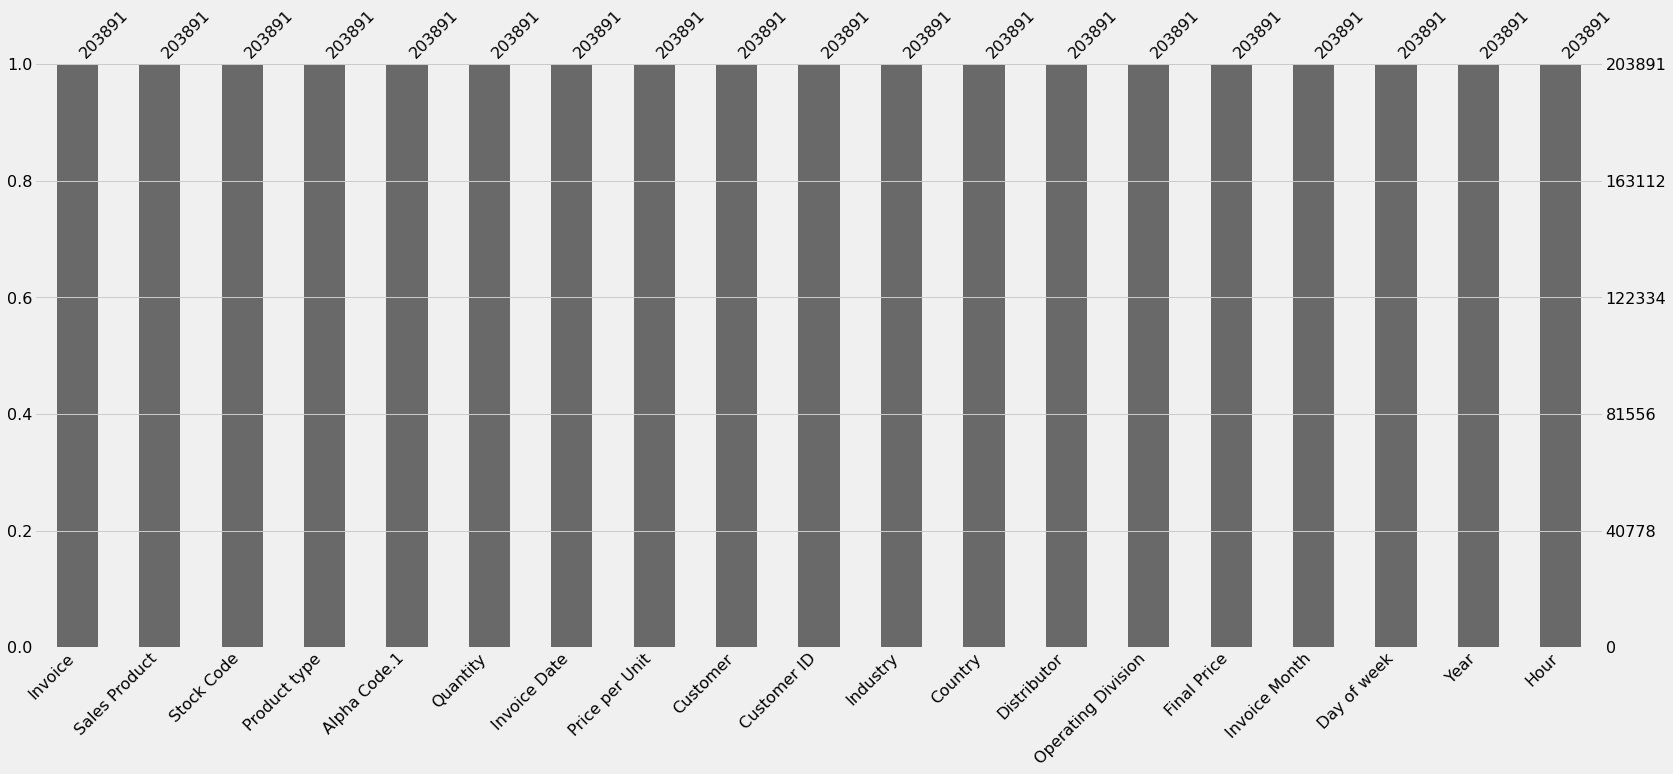

In [17]:
# visualizing missing values
msno.bar(df)

#### Finding and droping  duplicates

In [18]:
#finding duplicates
print('There are {} duplicates in dataset'.format(len(df[df.duplicated()])))

There are 2265 duplicates in dataset


In [19]:
df=df.drop_duplicates()

In [20]:
df.shape

(201626, 19)

## Exploratory data analysis

In [21]:
df.describe()

,Quantity,Price per Unit,Final Price,Year,Hour
count,201626.000000,201626.000000,201626.000000,201626.000000,201626.000000
mean,12.694117,2.911526,23.820021,2010.873603,12.618844
std,32.989617,2.832023,78.194771,0.332298,2.300934
min,1.000000,0.040000,0.100000,2010.000000,7.000000
25%,2.000000,1.250000,5.040000,2011.000000,11.000000
50%,6.000000,1.950000,12.750000,2011.000000,12.000000
75%,12.000000,3.750000,19.800000,2011.000000,14.000000
max,1056.000000,16.950000,5970.000000,2011.000000,20.000000


On the first look we can see that in "Quantity","Price per Unit" and "Final Price" column we have some outliers. We will visualize it and try to understand more from it.

### Visualizing distribution of coulmns

In [22]:
cols=["Quantity","Price per Unit","Final Price"]

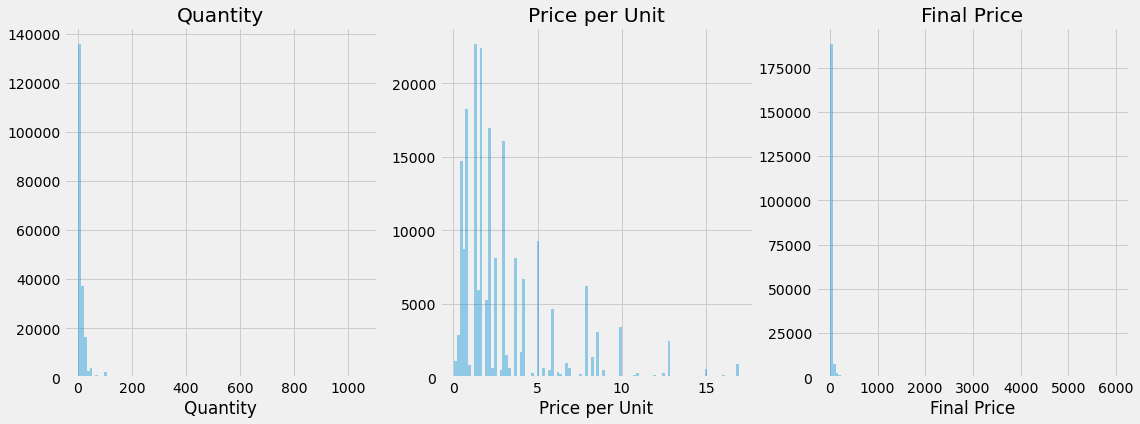

In [23]:
plt.figure(figsize=(17,6))
for i,feature in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.distplot(df[feature], hist=True, kde=False, label='All values', bins=100)
    plt.title(feature)

As we can see from histograms above, all our columns are right skewed.
- In "Quantity" coulmn most values are between 1 and 10.
- In "Price per Unit" most values are between 1 and 4.
- In "Final Price" most values are 0.1 and 20.

### Visualizing outliers

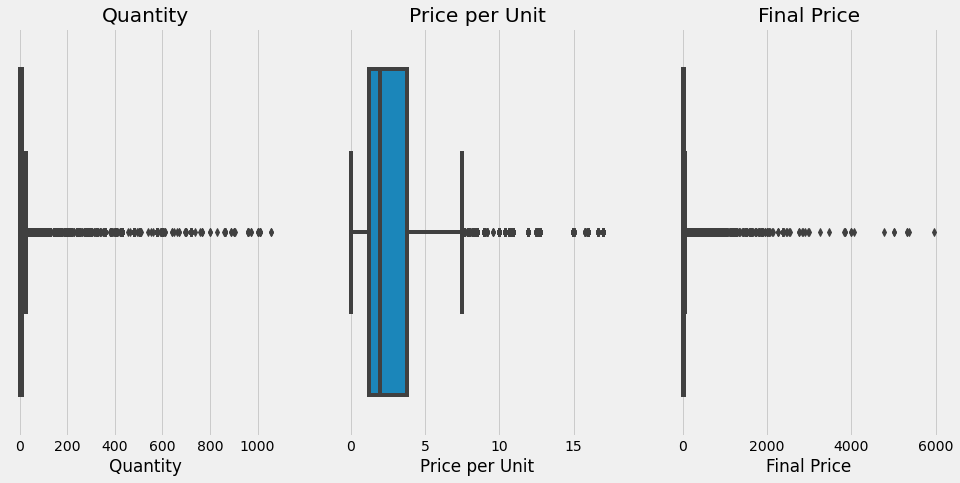

In [24]:
plt.figure(figsize=(15,7))
for i,feature in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[feature])
    plt.title(feature)

From the above table, I conclude the following points:

- There are  outliers in all the features
- Quantity and Final Price have the most outliers
- removing this outliers could get us  different conclusion
- we will **keep** outliers

### Correlation between numerical columns

<AxesSubplot:>

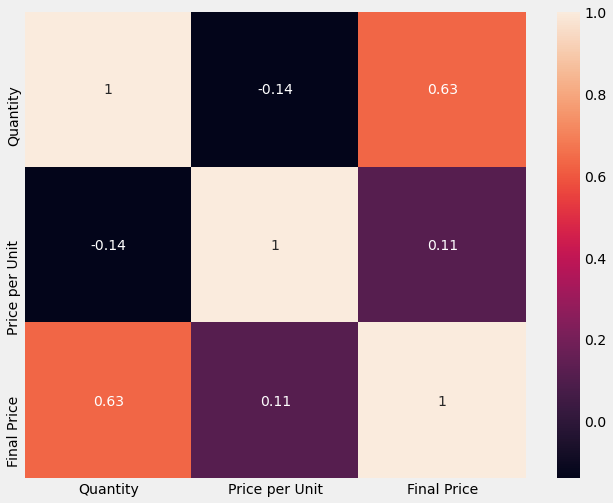

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["Quantity","Price per Unit","Final Price"]].corr(),annot=True)

From the above heatmap we can conclude this:
- only Final price and Quantity have linear correlation
- the higher quantity the higher final price
- other features are independent of each other

### Analyzing categorical coulmns

In [26]:
#extracting object columns
def extract_col(df):
    cat_col=[col for col in df.columns if df[col].dtypes=="object"]
    return cat_col

In [27]:
cat_col=extract_col(df)

In [28]:
cat_col

['Invoice',
 'Sales Product',
 'Stock Code',
 'Product type',
 'Alpha Code.1',
 'Customer',
 'Customer ID',
 'Industry',
 'Country',
 'Distributor',
 'Operating Division',
 'Invoice Month',
 'Day of week']

In [29]:
#unique values in categorical columns
for col in cat_col:
    print("{} has {} values".format(col,df[col].nunique()))

Invoice has 10292 values
Sales Product has 3225 values
Stock Code has 3290 values
Product type has 671 values
Alpha Code.1 has 704 values
Customer has 3154 values
Customer ID has 3169 values
Industry has 18 values
Country has 110 values
Distributor has 3 values
Operating Division has 6 values
Invoice Month has 9 values
Day of week has 6 values


In [30]:
#choosing only few categorical
cols=["Invoice","Sales Product","Product type","Customer","Country"]

In [31]:
data_cat= df[cols]
data_cat_2=data_cat.nunique().reset_index()
data_cat_2.columns=["Features","Unique values"]

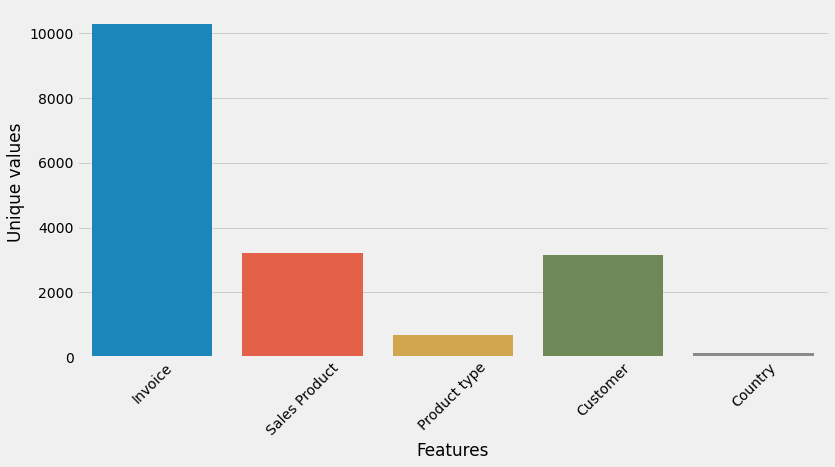

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x="Features",y="Unique values",data=data_cat_2)
plt.xticks(rotation=45)
plt.show()

From bar above I can conclude this:
- there is  more then 10 000 different invoices
- more then 3200 diferrent products 
- more then 100 countries 
- more then 3100 customers
- 600+ products type

### Time sales analysis

Before we move on we are going to count how many transactions we have in year 2010 and in year 2011. If we have a big difference in transactions we will not go into a detailed analysis because our analysis  would not be objective then.

In [33]:
df["Year"].value_counts()

2011    176141
2010     25485
Name: Year, dtype: int64

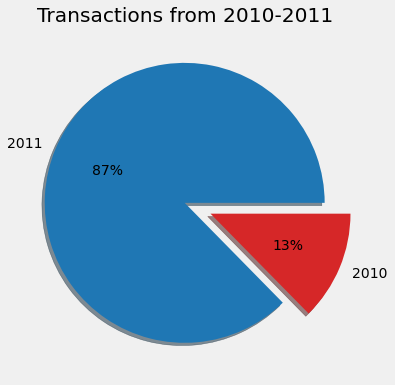

In [34]:
x = df["Year"].value_counts()
labels = df["Year"].unique()
colors = ['tab:blue','tab:red']
explode = [0, 0.2]
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, explode=explode,shadow = True, autopct='%.0f%%')
ax.set_title('Transactions from 2010-2011')
plt.show()

Since we have a lot more transactions from year 2011 we are **not**  going to do analysis individually for year 2010 and 2011.

### How many invoices are issued per month

In [35]:
import sort_dataframeby_monthorweek as sd

In [36]:
#function to sort the month in order
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)

In [37]:
data=df["Invoice Month"].value_counts().reset_index()
data.columns=["Month","Number of invoice"]
data

,Month,Number of invoice
0,May,27906
1,June,26749
2,March,26685
3,July,26406
4,December,25485
5,April,22288
6,January,20830
7,February,19583
8,August,5694


In [38]:
data_final=sort_data(data,"Month")
data_final

,Month,Number of invoice
0,January,20830
1,February,19583
2,March,26685
3,April,22288
4,May,27906
5,June,26749
6,July,26406
7,August,5694
8,December,25485


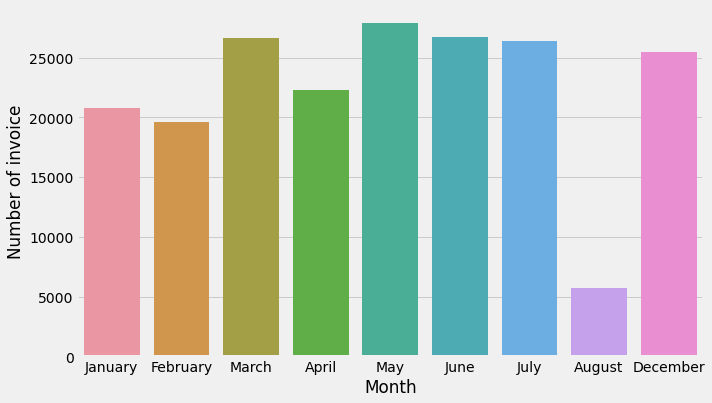

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="Number of invoice",data=data_final)
plt.show()

From bar plot above I came to this conclusion:
- most invoices are issused in March,May,June,July and December
- least invoices are issued in August
- in September, October, November we don't have any invoices 
- Invoices from December **2010**

### What months  have the most sales

In [40]:
month=df.groupby("Invoice Month")["Final Price"].sum().reset_index()
month=sort_data(month,"Invoice Month")
month

,Invoice Month,Final Price
0,January,514801.28
1,February,468300.26
2,March,617722.83
3,April,458344.51
4,May,700307.65
5,June,674806.05
6,July,625316.14
7,August,124746.77
8,December,618389.97


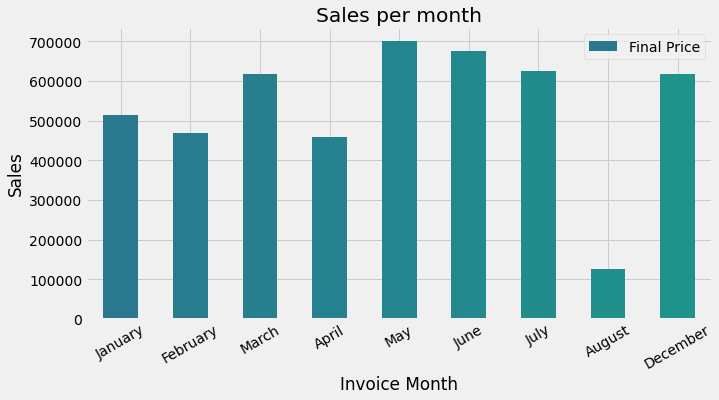

In [41]:
# sale per month
color = cm.viridis(np.linspace(.4, .8, 30))
month.plot.bar(x="Invoice Month", y='Final Price', color=color , figsize=(10,5))
plt.title("Sales per month")
plt.xticks(rotation=30)
plt.ylabel("Sales")
plt.show()

Conclusion:
- most sales are in May, June, July and December
- least sales are in August

### What days of week  have the most sales

In [42]:
df.groupby("Day of week")["Final Price"].sum()

Day of week
Friday        691220.04
Monday        716231.85
Sunday        419773.09
Thursday     1117957.10
Tuesday       971980.30
Wednesday     885573.08
Name: Final Price, dtype: float64

In [43]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [44]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df["Day of week"] = df["Day of week"].astype(cat_type)

In [45]:
df.groupby("Day of week")["Final Price"].sum()

Day of week
Monday        716231.85
Tuesday       971980.30
Wednesday     885573.08
Thursday     1117957.10
Friday        691220.04
Saturday           0.00
Sunday        419773.09
Name: Final Price, dtype: float64

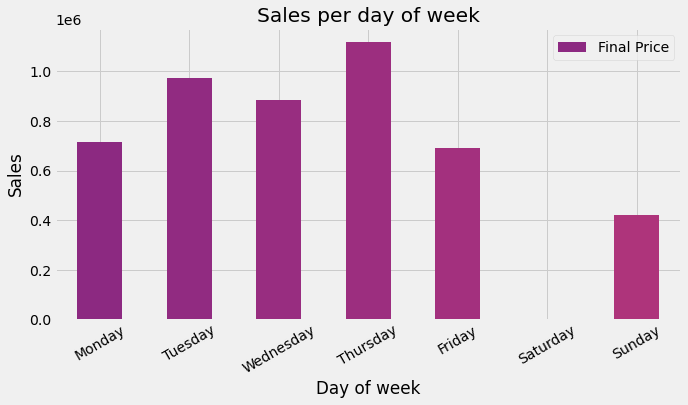

In [46]:
# sale per day of week
day_price=df.groupby("Day of week")["Final Price"].sum().reset_index("Day of week")
color = cm.magma(np.linspace(.4, .8, 30))
day_price.plot.bar(x="Day of week", y='Final Price', color=color , figsize=(10,5))
plt.title("Sales per day of week")
plt.xticks(rotation=30)
plt.ylabel("Sales")
plt.show()

Conclusion:
- most profit day of the week is Thursday followed by Tuesday and Wednesday
- we don't have any transactions on Saturday
- sales fall at the end of the week 

### At what time most invoices were issued

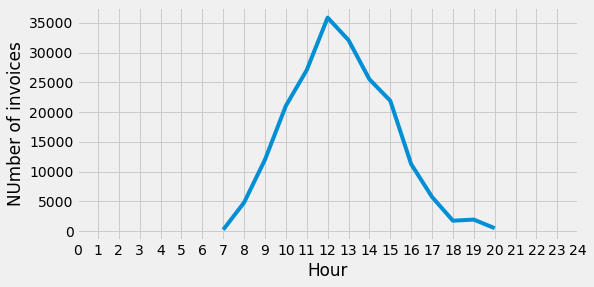

In [47]:
#plotting time of ordering
plt.figure(figsize=(8,4))
df.groupby("Hour")["Hour"].count().plot()
plt.xlabel("Hour")
plt.ylabel("NUmber of invoices")
plt.xticks(range(0,25))
plt.show()

We can se them most invoices were issued between 12:00 and 13:00.

### How many products were sold per month

In [48]:
#counting how many each product has been ordered
quantity=df.groupby("Invoice Month")["Quantity"].sum().reset_index()
quantity

,Invoice Month,Quantity
0,April,272735
1,August,75669
2,December,294280
3,February,245667
4,January,261428
5,July,352989
6,June,358223
7,March,338685
8,May,359788


In [49]:
quantity=sort_data(quantity,"Invoice Month")

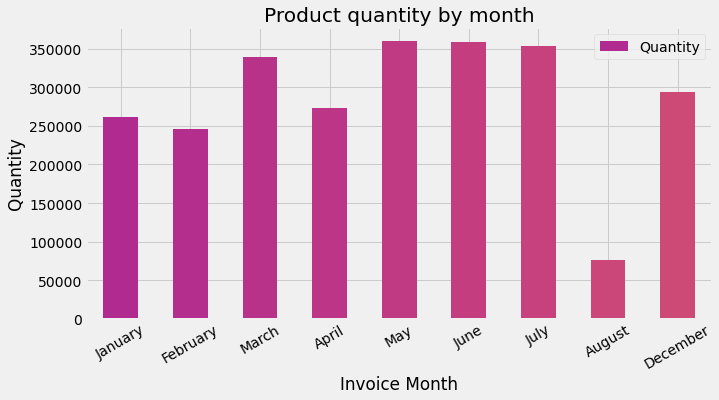

In [116]:
color = cm.plasma(np.linspace(.4, .8, 30))
quantity.plot.bar(x="Invoice Month", y='Quantity', color=color , figsize=(10,5))
plt.title("Product quantity by month")
plt.xticks(rotation=30)
plt.ylabel("Quantity")
plt.show()

Conclusion:
- most products were sold  in May,June and July
- least products were sold in August
- if we compare sales with quantity we can see that months with most profit have sold the most products

In [51]:
quantity_day=df.groupby("Day of week")["Quantity"].sum().reset_index()
quantity_day

,Day of week,Quantity
0,Monday,378442
1,Tuesday,497017
2,Wednesday,498818
3,Thursday,589895
4,Friday,361055
5,Saturday,0
6,Sunday,234237


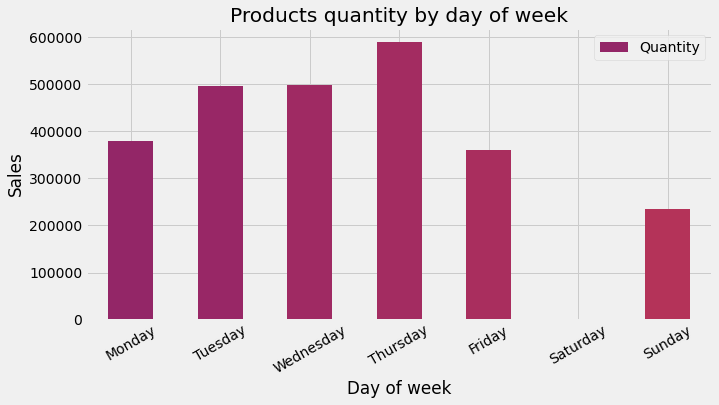

In [115]:
color = cm.inferno(np.linspace(.4, .8, 30))
quantity_day.plot.bar(x="Day of week", y='Quantity', color=color , figsize=(10,5))
plt.title("Products quantity by day of week")
plt.xticks(rotation=30)
plt.ylabel("Sales")
plt.show()

Conclusion:
- most products were sold  on Thursday,Wedneday and Tuesday
- least products were sold on SUnday
- none products were sold on Saturday
- if we compare sales per day with quantity of products we can see that days with most profit have sold the most products

### Products most often sold together

In [53]:
#making new dataframe with product that are sold together
products=df[df["Invoice"].duplicated(keep=False)]
products.head()

,Invoice,Sales Product,Stock Code,Product type,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Distributor,Operating Division,Final Price,Invoice Month,Day of week,Year,Hour
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,May,Tuesday,2011,13
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,June,Thursday,2011,13
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,1.66,December,Wednesday,2010,12


In [54]:
#making column with all products in same order
products["Products in order"]=products.groupby("Invoice")["Sales Product"].transform(lambda x: ",".join(x))
products.head()

,Invoice,Sales Product,Stock Code,Product type,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Distributor,Operating Division,Final Price,Invoice Month,Day of week,Year,Hour,Products in order
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,May,Tuesday,2011,13,"NEOPOLEN P 9230 K BS,ELESERYL HGP LS 9874,AM90..."
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16,"NEOPOLEN P 9255 BSW,NEOPOLEN P 9225 K BS,AGNIQ..."
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,June,Thursday,2011,13,"NEOPOLEN P 9255 BSW,POLIGEN WE 7,A00298 MICROP..."
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16,"NEOPOLEN P 9255 BSW,NEOPOLEN P 9225 K BS,AGNIQ..."
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08:00,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,Distributor no,PERFORMANCE MATERIAL,1.66,December,Wednesday,2010,12,"NEOPOLEN P 9225 K BS,A00234 BETAPUR PF,ELESERY..."


In [55]:
#droping duplicates
products_order=products[["Invoice","Products in order"]].drop_duplicates()
products_order.head(10)

,Invoice,Products in order
0,553503,"NEOPOLEN P 9230 K BS,ELESERYL HGP LS 9874,AM90..."
1,536591,"NEOPOLEN P 9255 BSW,NEOPOLEN P 9225 K BS,AGNIQ..."
2,556202,"NEOPOLEN P 9255 BSW,POLIGEN WE 7,A00298 MICROP..."
4,537765,"NEOPOLEN P 9225 K BS,A00234 BETAPUR PF,ELESERY..."
5,541595,"DEHYPON 2574/MB,1-VINYLIMIDAZOLE,PLURIOL A 700..."
6,543281,"DEHYPON 2574/MB,A00234 BETAPUR PF,LUPRANOL 209..."
7,545838,"ELASTOPOR H 2070/1/H,2-PYRROLIDONE DIST.,LAMEQ..."
8,548870,"ELASTOPOR H 2070/1/H,LA 12 F,ULF.N2640 Z2 AT B..."
9,554491,"ELASTOPOR H 2070/1/H,DISPONIL BES 20,PLURIOL A..."
12,538839,"AGNIQUE ABS 30 TN,DISPONIL BES 20,LA 12 F,DISP..."


In [56]:
from itertools import combinations
from collections import Counter

In [57]:
#counting unique pair of 2 products 
count=Counter()
for row in products_order["Products in order"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2))) # 2 pair
# printing most common products   
for key,value in count.most_common(10):
    print(key,value)

('N', 'N-DIMETHYLACETAMID') 725
('VITACELL POWDER LS 7', 'DEHYQUART GUAR HP') 364
('EB 85 A 15 000', 'KAURIT GLUE 325 LIQ') 330
('DEMELAN 1990', 'EC 95 A 15HPM000') 328
('E 794 A 15CS000', 'KAURIT GLUE 325 LIQ') 318
('KAURAMIN HARD. 688 L', 'KAURIT GLUE 325 LIQ') 316
('KAURIT GLUE 328 PLUS', 'KAURIT GLUE 325 LIQ') 296
('E 1185 A 10WM000', 'KONZ 950/1 FC') 291
('EB 85 A 15 000', 'KAURAMIN HARD. 688 L') 291
('CO2 3.0 LIQUID', ' PURE') 290


From above result we can see that products "N", "N-DIMETHYLACETAMID" were sold 725 time which is the most. 

In [58]:
#counting unique pair of 2 products 
count=Counter()
for row in products_order["Products in order"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2))) # 2 pair
# printing least common products   
for key,value in count.most_common()[:-10-1:-1] :
    print(key,value)

('N-BUTANOL', 'N-BUTANOL') 1
('KAURIT GLUE 385 LIQ', '0 STAB.TOC.') 1
('KAURIT GLUE 385 LIQ', 'VIT.AP 1') 1
('DEMELAN VPC', 'DEHYDOL LS 4 DEO N') 1
('LUTENSOL XP 50', '0 STAB.TOC.') 1
('LUTENSOL XP 50', 'VIT.AP 1') 1
('ULD.B4406G6 UN', 'SOLVENON PM') 1
('ULD.B4406G6 UN', 'N-PROPANOL') 1
('ULD.B4406G6 UN', 'N-BUTYL  ACETATE') 1
('ULT.A3WG5 UN', '2-PROPYLENE GLYCOL') 1


Above is a list of least buying product together. 

### Most sold products in certain industry

In [59]:
df.Industry.value_counts()

#                       100870
Construction             18581
Agriculture              16848
Textiles                 13170
Health                   11089
Electrical/Electron       9837
Cosmetics                 7168
Food                      5419
Automotive                5161
Packaging                 4835
Soaps and Detergents      2194
Environment               1661
Furniture                 1596
Patent Agent              1022
Private Consumption       1016
Printing/Graphics         1006
Other                       82
BASF Group Companies        71
Name: Industry, dtype: int64

In [60]:
df["Industry"]=df["Industry"].replace({"#":"Unknown industry"})

In [118]:
industry=df.groupby(["Industry"])["Sales Product"].count().sort_values(ascending=False).reset_index()
industry.columns=["Industry","Number of products"]
industry

,Industry,Number of products
0,Unknown industry,100870
1,Construction,18581
2,Agriculture,16848
3,Textiles,13170
4,Health,11089
5,Electrical/Electron,9837
6,Cosmetics,7168
7,Food,5419
8,Automotive,5161
9,Packaging,4835


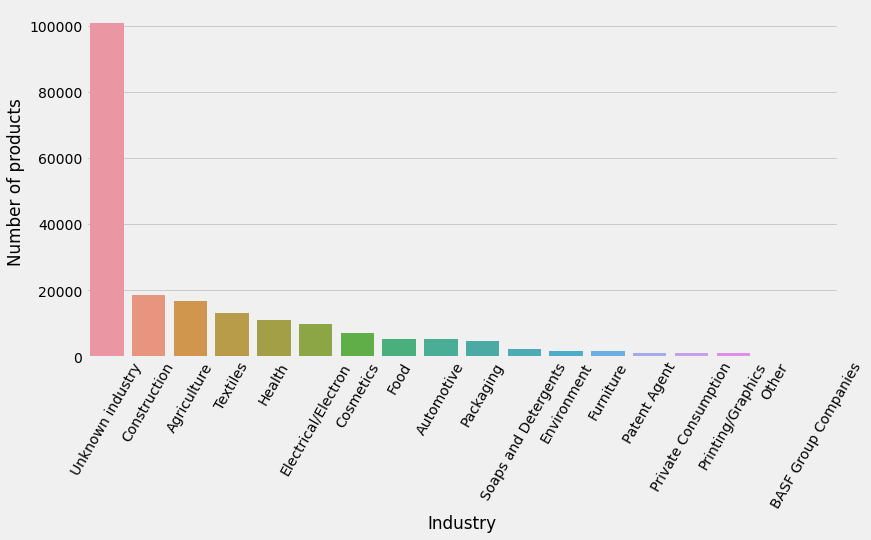

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x="Industry",y="Number of products",data=top_10_industry)
plt.xticks(rotation=60)
plt.show()

We can see from above that:
- we have a lot of products which have no industry category
- products in Construction, Agriculture, Textiles  are most represented
- least represented are in BASF Group Comapnies,Prinitng/Graphics 

### Countries with  most transaction

In [120]:
top_10_countries=df.groupby(["Country"])["Invoice"].count().sort_values(ascending=False)[:10].reset_index()
top_10_countries.columns=["Country","Number of invoice"]
top_10_countries

,Country,Number of invoice
0,Bulgaria,43670
1,Indonesia,13206
2,Poland,12389
3,Czech Republic,9830
4,South Korea,8837
5,Romania,8697
6,Denmark,6471
7,Morocco,6204
8,Italy,5546
9,USA,5243


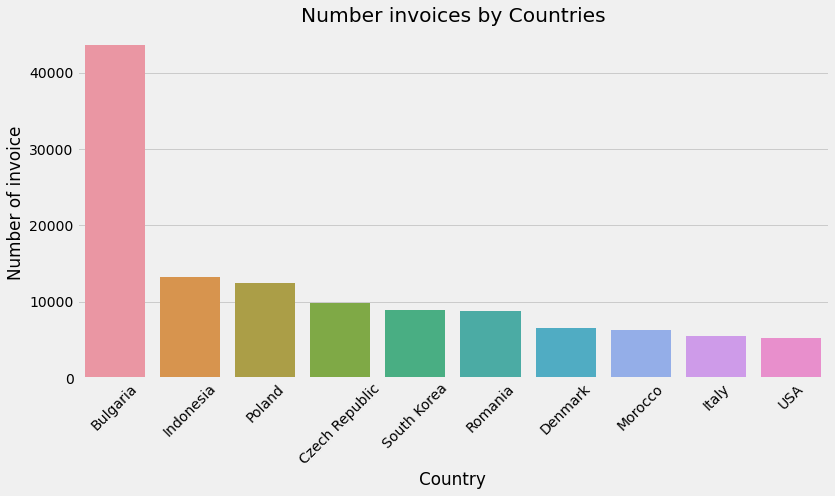

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(x="Country",y="Number of invoice",data=top_10_countries)
plt.xticks(rotation=45)
plt.title("Number invoices by Countries")
plt.show()

From the bar above we can conclude:
- we have invoices from different parts of world  
- most invoices were issued in Bulgaria


In [122]:
least_10_countries=df.groupby(["Country"])["Invoice"].count().sort_values(ascending=True)[:10].reset_index()
least_10_countries.columns=["Country","Number of invoice"]
least_10_countries

,Country,Number of invoice
0,South Africa,1
1,Kuwait,3
2,Kosovo,9
3,Guinea,15
4,Montenegro,16
5,Libya,17
6,Russian Fed.,21
7,Germany,22
8,Luxembourg,23
9,Burundi,23


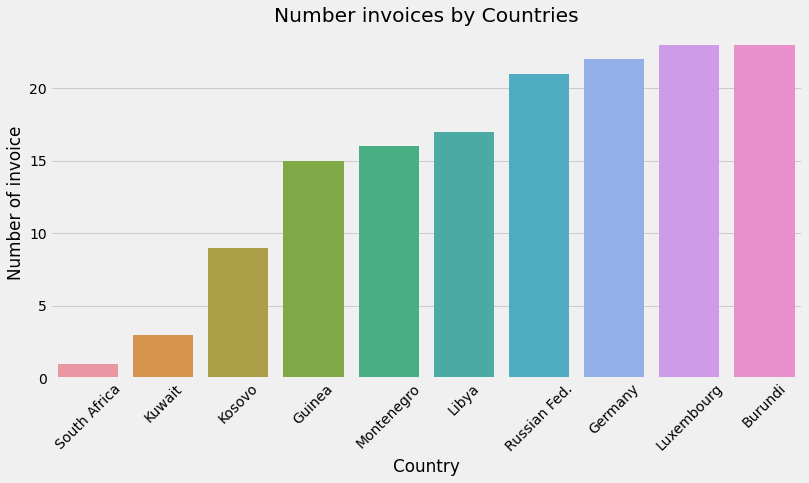

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(x="Country",y="Number of invoice",data=least_10_countries)
plt.xticks(rotation=45)
plt.title("Number invoices by Countries")
plt.show()

- in South Africa,Kuwait  we have least invoices

### Country with highest sales

In [124]:
# top 10 countries with most sales
top_sales=df.groupby(["Country"])["Final Price"].sum().sort_values(ascending=False)[:10].reset_index()
top_sales

,Country,Final Price
0,Bulgaria,1030184.21
1,Indonesia,367084.71
2,Morocco,341947.00
3,Poland,273859.69
4,Czech Republic,240166.42
5,Romania,195176.98
6,France,165465.29
7,South Korea,131251.10
8,Denmark,127175.04
9,Ukraine,120503.94


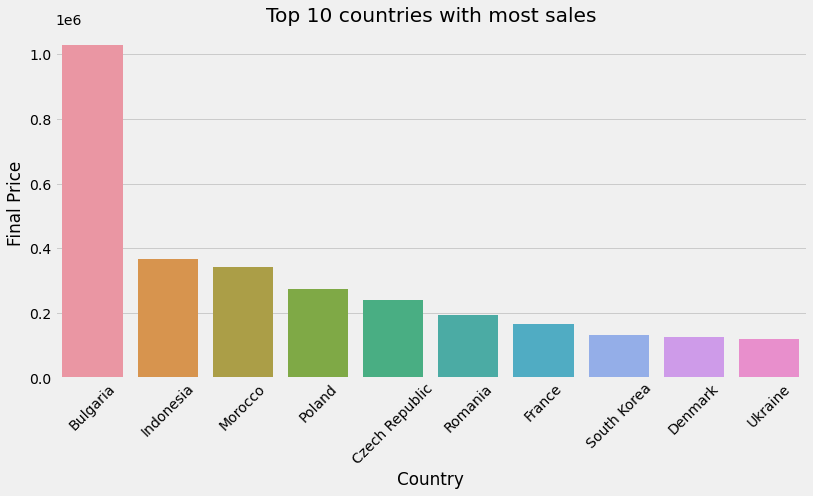

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(x="Country",y="Final Price",data=top_sales)
plt.xticks(rotation=45)
plt.title("Top 10 countries with most sales")
plt.show()

- Bulgaria is top country with most sales

### Most sold products by countries

In [69]:
# most sold products in top 10 countries
top_quantity=df.groupby(["Country"])["Quantity"].sum().sort_values(ascending=False)[:10].reset_index()
top_quantity

,Country,Quantity
0,Bulgaria,562444
1,Indonesia,213034
2,Poland,143806
3,Czech Republic,126452
4,Romania,116070
5,Morocco,107807
6,France,93311
7,Denmark,73920
8,South Korea,72783
9,Peru,64498


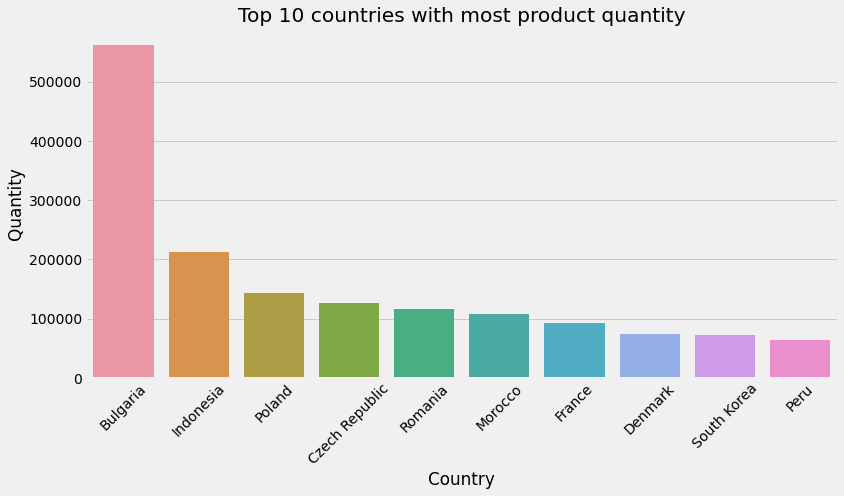

In [129]:
plt.figure(figsize=(12,6))
sns.barplot(x="Country",y="Quantity",data=top_quantity)
plt.xticks(rotation=45)
plt.title("Top 10 countries with most product quantity")
plt.show()

Comparing sales and quantitity we can see that some countries have less sales even though we have more quntity

### Types of products sold the most

In [71]:
product_type=df["Product type"].value_counts()[:10].reset_index()
product_type.columns=["Type of products","Number of type of products"]
product_type

,Type of products,Number of type of products
0,CATALOG PRODUCTS,9358
1,OTHER LEGACY LAB-SER,5494
2,ALCOHOL ETHOXYLATES_,5100
3,"MASTERBATCHES, CONC.",3963
4,ALCOHOL ALKOXYLATES_,3307
5,1100 SERIES,2869
6,ULT.A3WG.,2529
7,WAX & WAX ESTERS,2299
8,SOLUBILIZER,2055
9,BLENDS & OTHER SURFA,2040


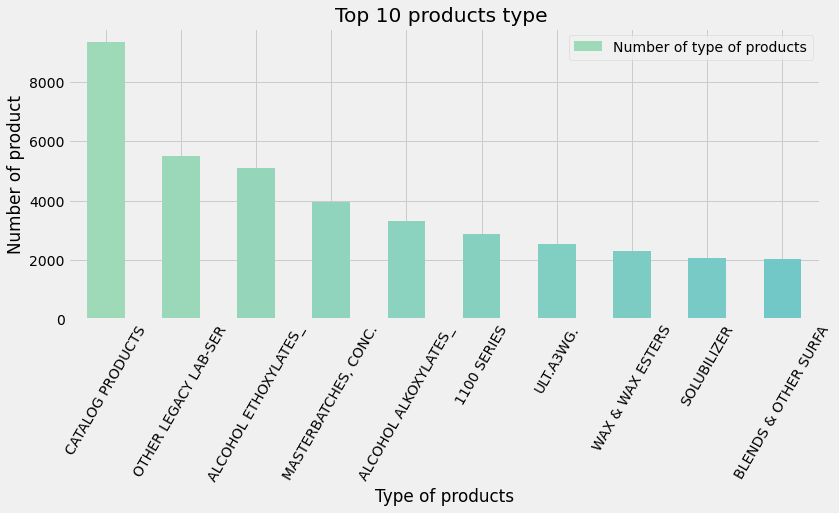

In [130]:
color = cm.GnBu(np.linspace(.4, .8, 30))
product_type.plot.bar(x="Type of products", y='Number of type of products', color=color , figsize=(12,5))
plt.title("Top 10 products type ")
plt.xticks(rotation=60)
plt.ylabel("Number of product")
plt.show()

- catalog products are sold the most 
- blends & other surfa,solubiizer are sold least

###  Types of products sold in Bulgaria

In [73]:
bulgaria=df[df["Country"]=="Bulgaria"]

In [74]:
bulgaria_type=bulgaria["Product type"].value_counts()[:10].reset_index()
bulgaria_type.columns=["Type of products","Number of type of products"]
bulgaria_type

,Type of products,Number of type of products
0,CATALOG PRODUCTS,1952
1,OTHER LEGACY LAB-SER,1199
2,ALCOHOL ETHOXYLATES_,1146
3,"MASTERBATCHES, CONC.",826
4,1100 SERIES,700
5,ALCOHOL ALKOXYLATES_,694
6,ULT.A3WG.,566
7,WAX & WAX ESTERS,502
8,SOLUBILIZER,483
9,BLENDS & OTHER SURFA,442


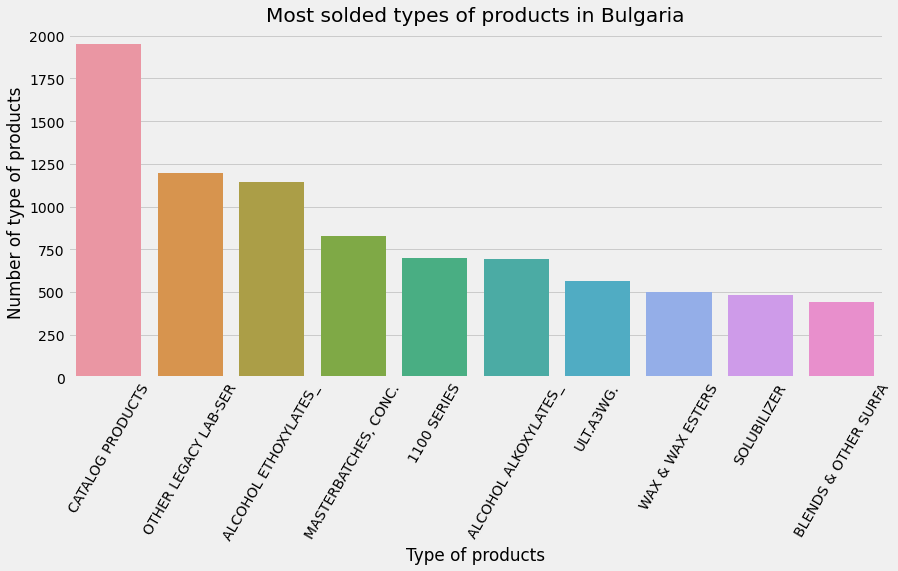

In [132]:
plt.figure(figsize=(13,6))
sns.barplot(x="Type of products",y="Number of type of products",data=bulgaria_type)
plt.xticks(rotation=60)
plt.title("Most solded types of products in Bulgaria")
plt.show()

### Which customers bought the most 

In [76]:
df.head()

,Invoice,Sales Product,Stock Code,Product type,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Distributor,Operating Division,Final Price,Invoice Month,Day of week,Year,Hour
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20:00,0.83,SCHATTDECOR DO BRASI,14606,Unknown industry,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,May,Tuesday,2011,13
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,Unknown industry,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08:00,0.83,SCHATTDECOR DO BRASI,14606,Unknown industry,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,June,Thursday,2011,13
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,Unknown industry,Romania,Distributor no,PERFORMANCE MATERIAL,0.83,December,Wednesday,2010,16
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08:00,0.83,SCHATTDECOR DO BRASI,14606,Unknown industry,Romania,Distributor no,PERFORMANCE MATERIAL,1.66,December,Wednesday,2010,12


In [77]:
# top 10 customers with most purchase
cust_sale=df.groupby("Customer")["Final Price"].sum().sort_values(ascending=False)[:10].reset_index()
cust_sale

,Customer,Final Price
0,MILITEX B.V.,197453.97
1,TATA STEEL UK LTD,160334.09
2,PowerPak Kereskedelm,89376.40
3,UNILEVER ANDINA BOLI,74742.48
4,Cefak KG,68798.86
5,Artekno Oy,63969.03
6,"ADM PORTUGAL, S.A.",59376.94
7,HUNTSMAN QUIMICA BRA,52158.25
8,CfB Burgenger GmbH,50714.65
9,UPL SOUTH AFRICA (PT,50242.29


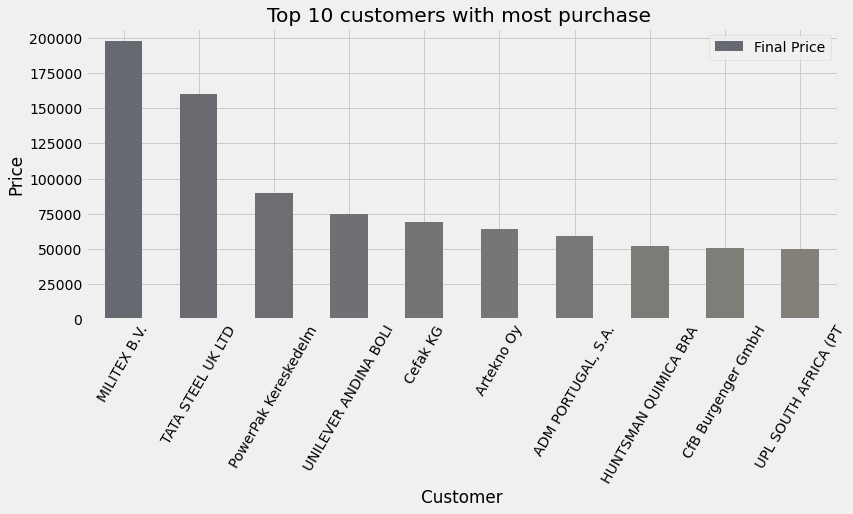

In [133]:
color = cm.cividis(np.linspace(.4, .8, 30))
cust_sale.plot.bar(x="Customer", y='Final Price', color=color , figsize=(12,5))
plt.title("Top 10 customers with most purchase ")
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.show()

### Customers which bought least

In [79]:
# top 10 customers withl east purchase
cust_sale_least=df.groupby("Customer")["Final Price"].sum().sort_values(ascending=True)[:10].reset_index()
cust_sale_least

,Customer,Final Price
0,MAIN SPA,2.90
1,MITRAS Materials Gmb,3.75
2,INCASA SA,5.90
3,Solar Inks Ltd,7.50
4,GALAM LTD.,9.20
5,NIPPON PAINT AUTOMOT,11.75
6,CCL Pentasol Ltd,12.75
7,SOCANE SARL,15.00
8,MAPRIAL SRL,15.00
9,ARKEM KIMYA SANAYI,17.55


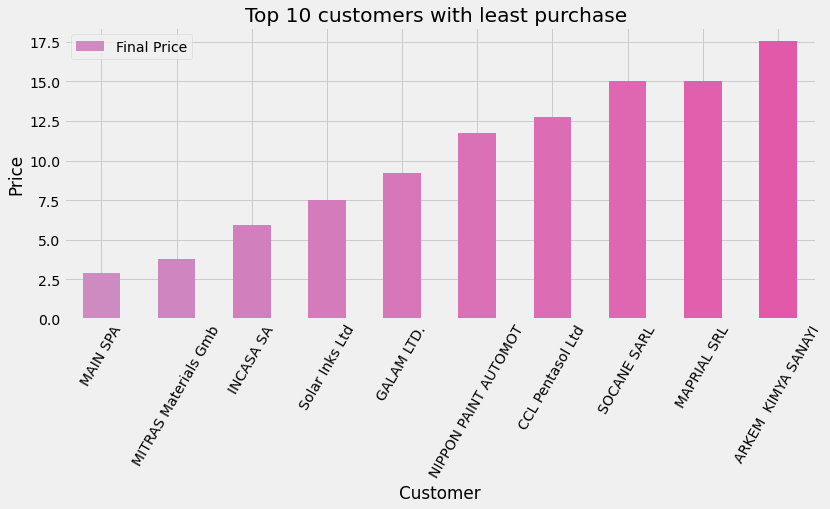

In [134]:
color = cm.PuRd(np.linspace(.4, .8, 30))
cust_sale_least.plot.bar(x="Customer", y='Final Price', color=color , figsize=(12,5))
plt.title("Top 10 customers with least purchase ")
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.show()

### Average purchase by customers

In [81]:
# top 10 customers with most purchase
cust_sale_avg=df.groupby("Customer")["Final Price"].mean().sort_values(ascending=False)[:10].reset_index()
cust_sale_avg

,Customer,Final Price
0,Fiberboard GmbH,5326.500000
1,DuPont Nutrition Bio,1999.360000
2,MILITEX B.V.,1334.148446
3,FrieslandCampina DOM,1113.000000
4,"TIMAC AGRO ESPAÑA, S",1112.377500
5,MOBACC B.V.,973.500000
6,Chemelco Internation,877.500000
7,MELCOPLAST S.A.S.,780.000000
8,HOLCHEM LABORATORIES,690.000000
9,Neal's Yard (Natural,641.750000


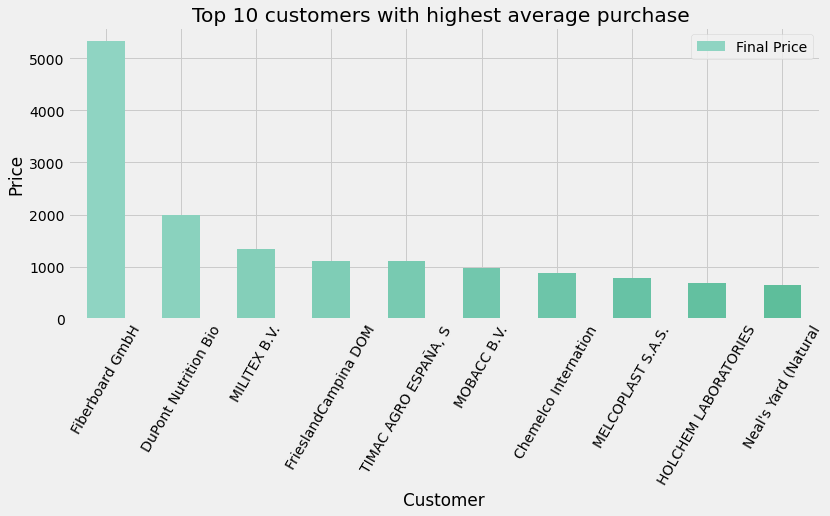

In [82]:
color = cm.BuGn(np.linspace(.4, .8, 30))
cust_sale_avg.plot.bar(x="Customer", y='Final Price', color=color , figsize=(12,5))
plt.title("Top 10 customers with highest average purchase ")
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.show()

### Average quantity by customers

In [83]:
# top 10 customers with most purchase
cust_qty_avg=df.groupby("Customer")["Quantity"].mean().sort_values(ascending=False)[:10].reset_index()
cust_qty_avg

,Customer,Quantity
0,Heyco-Werk,1000.0
1,HERCO COMBUSTIBLES S,720.0
2,Fiberboard GmbH,670.0
3,COSMOPAR S.A.S.,600.0
4,CERIN GmbH,600.0
5,FrieslandCampina DOM,524.0
6,DuPont Nutrition Bio,512.0
7,POLSKIE GÓRNICTWO NA,504.0
8,Chemelco Internation,450.0
9,MELCOPLAST S.A.S.,400.0


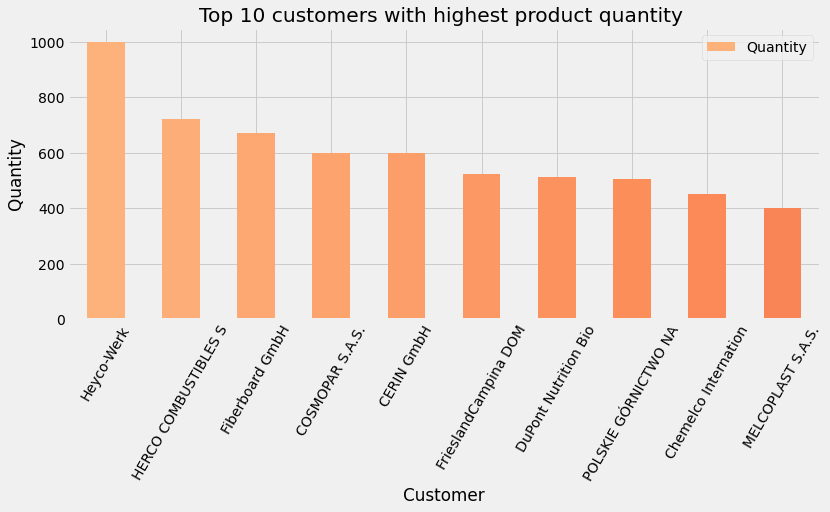

In [136]:
color = cm.OrRd(np.linspace(.4, .8, 30))
cust_qty_avg.plot.bar(x="Customer", y='Quantity', color=color , figsize=(12,5))
plt.title("Top 10 customers with highest product quantity ")
plt.xticks(rotation=60)
plt.ylabel("Quantity")
plt.show()

### What  type of products top customer buy the most

In [85]:
customer=df[df["Customer"]=="MILITEX B.V."]

In [86]:
most_products=customer["Product type"].value_counts()[:10].reset_index()
most_products.columns=["Type of product","Quantity"]
most_products

,Type of product,Quantity
0,ULT.STRUCTURE A..,13
1,RIGID POLYETHEROLS A,12
2,EXPERIMENTALS,9
3,DIETHYLENE GLYCOL,8
4,ULD. B4300G..,7
5,ULT.B3Z,6
6,DIVERGAN,6
7,VIT. A HUMAN,6
8,SDR.2800C,5
9,WAXES,5


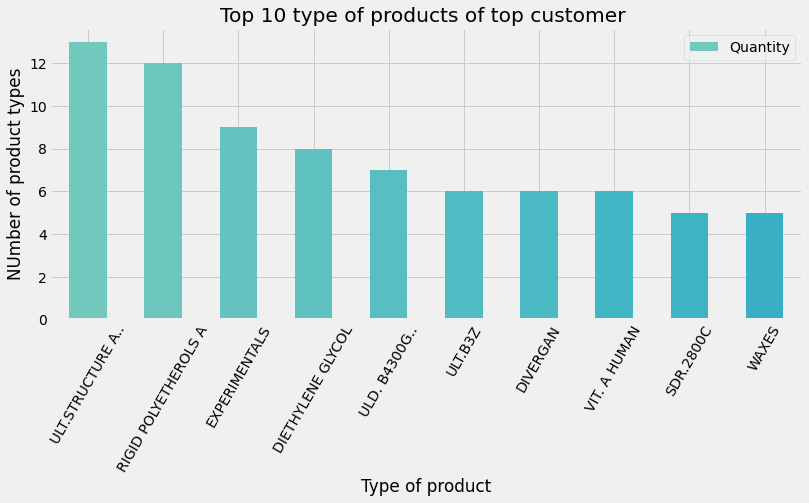

In [87]:
color = cm.YlGnBu(np.linspace(.4, .8, 30))
most_products.plot.bar(x="Type of product", y="Quantity", color=color , figsize=(12,5))
plt.title("Top 10 type of products of top customer ")
plt.xticks(rotation=60)
plt.ylabel("NUmber of product types")
plt.show()

### What operating divisions have most sales

In [88]:
operating=df.groupby(["Operating Division"])["Final Price"].sum().reset_index()
operating.columns=["Operating Division","Sales"]
operating

,Operating Division,Sales
0,CARE CHEMICALS,608231.13
1,INTERMEDIATES,1770522.37
2,MONOMERS,516416.90
3,NUTRITION & HEALTH,517871.65
4,PERFORMANCE MATERIAL,807156.62
5,PETROCHEMICALS,582536.79


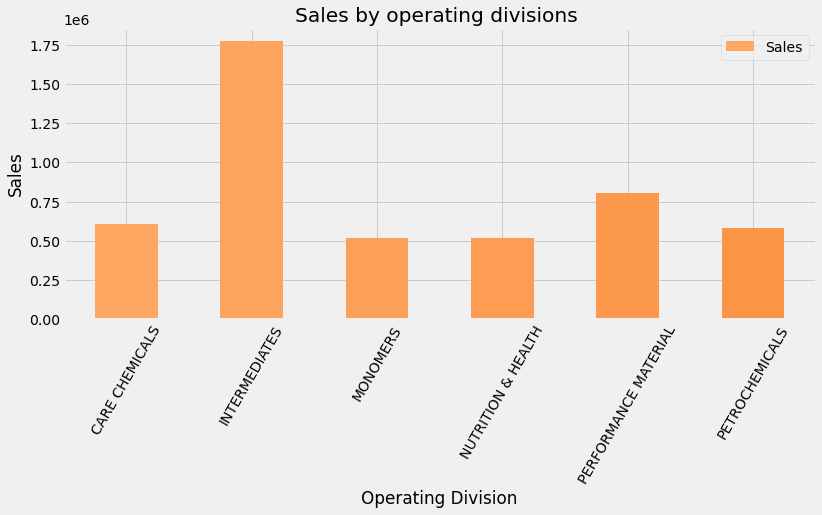

In [89]:
color = cm.Oranges(np.linspace(.4, .8, 30))
operating.plot.bar(x="Operating Division", y="Sales", color=color , figsize=(12,5))
plt.title("Sales by operating divisions ")
plt.xticks(rotation=60)
plt.ylabel("Sales")
plt.show()

### In which operating divisions products sells the most

In [90]:
operating_qty=df.groupby(["Operating Division"])["Quantity"].sum().reset_index()
operating_qty.columns=["Operating Division","Quantity"]
operating_qty

,Operating Division,Quantity
0,CARE CHEMICALS,329357
1,INTERMEDIATES,915241
2,MONOMERS,282641
3,NUTRITION & HEALTH,290320
4,PERFORMANCE MATERIAL,440564
5,PETROCHEMICALS,301341


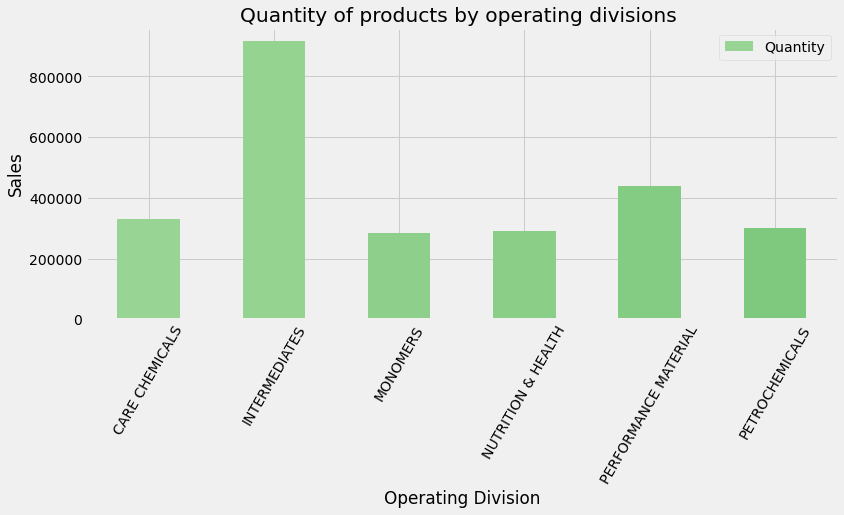

In [137]:
color = cm.Greens(np.linspace(.4, .8, 30))
operating_qty.plot.bar(x="Operating Division", y="Quantity", color=color , figsize=(12,5))
plt.title("Quantity of products by operating divisions ")
plt.xticks(rotation=60)
plt.ylabel("Sales")
plt.show()

### Mutual information

Before we calculate our mutual information between features and target variable (Final Price) we need to transform our categorical features into numerical by using one hot encoding and label encoder techique. For nominal categorical variables we will use one hot encoding and for ordinal label encoder. We have a lot of categorical variables which are nominal and have a lot of unique values so we will not use them because for every unique value we need to make one column and if we use them all we would have few thousands extra columns which is bad.

#### One hot encoding

In [92]:
# one hot-encoding
industry=pd.get_dummies(df["Industry"])
industry.head()

,Agriculture,Automotive,BASF Group Companies,Construction,Cosmetics,Electrical/Electron,Environment,Food,Furniture,Health,Other,Packaging,Patent Agent,Printing/Graphics,Private Consumption,Soaps and Detergents,Textiles,Unknown industry
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [93]:
# one hot-encoding
op_division=pd.get_dummies(df["Operating Division"])
op_division.head()

,CARE CHEMICALS,INTERMEDIATES,MONOMERS,NUTRITION & HEALTH,PERFORMANCE MATERIAL,PETROCHEMICALS
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [94]:
# one hot-encoding
dist=pd.get_dummies(df["Distributor"])
dist.head()

,Distributor no,Distributor yes,Not assigned
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Label encoder

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
encoder=LabelEncoder()

In [97]:
df["Invoice Month"]=encoder.fit_transform(df["Invoice Month"])
df["Day of week"]=encoder.fit_transform(df["Day of week"])

In [98]:
data_dummies=pd.concat([industry,op_division,dist],axis=1)

In [99]:
features=df[["Quantity","Final Price","Price per Unit","Invoice Month","Day of week"]]
features.head()

,Quantity,Final Price,Price per Unit,Invoice Month,Day of week
0,1,0.83,0.83,8,4
1,1,0.83,0.83,2,5
2,1,0.83,0.83,6,3
3,1,0.83,0.83,2,5
4,2,1.66,0.83,2,5


In [100]:
data=pd.concat([features,data_dummies],axis=1)

In [101]:
from sklearn.feature_selection import mutual_info_regression

In [102]:
def impute(df):
    """
    Fill categorical variables with new category 'Missing'.
    param df:           input pandas dataframe
    return df_not_none: pandas dataframe with filled missing values for categorical variables
    """
    df_not_none = df.copy()
    for name in df.select_dtypes("object"):
        df_not_none[name] = df[name].fillna("Missing")
        
    return df_not_none

In [103]:
def make_mi_scores(X, y):
    """
    Calculate mutual information scores for all categorical variables in relation to continuus target variable.
    param x:           input pandas dataframe with excluded target variable
    param y:           input pandas series of target variable
    return mi_scores:  pandas series, mutual info scores
    """
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [104]:
df_mut_info = impute(data)
x = df_mut_info.drop(["Final Price"],axis=1)
y = df['Final Price']
mi_scores = make_mi_scores(x, y)
mi_scores

Price per Unit          3.013718
Quantity                2.248146
Invoice Month           0.039708
Day of week             0.024855
Distributor no          0.015658
Distributor yes         0.014956
Unknown industry        0.012512
PERFORMANCE MATERIAL    0.005480
Construction            0.004888
Health                  0.004806
Textiles                0.004500
INTERMEDIATES           0.004480
NUTRITION & HEALTH      0.004064
MONOMERS                0.003862
Electrical/Electron     0.003850
Automotive              0.003357
Agriculture             0.003172
PETROCHEMICALS          0.002761
Soaps and Detergents    0.002637
Food                    0.002326
CARE CHEMICALS          0.001932
Cosmetics               0.001688
Packaging               0.001548
Not assigned            0.001442
Furniture               0.001407
Patent Agent            0.001212
Environment             0.000940
Printing/Graphics       0.000936
Private Consumption     0.000719
Other                   0.000428
BASF Group

In [105]:
scores=mi_scores.sort_values(ascending=False)[:15]

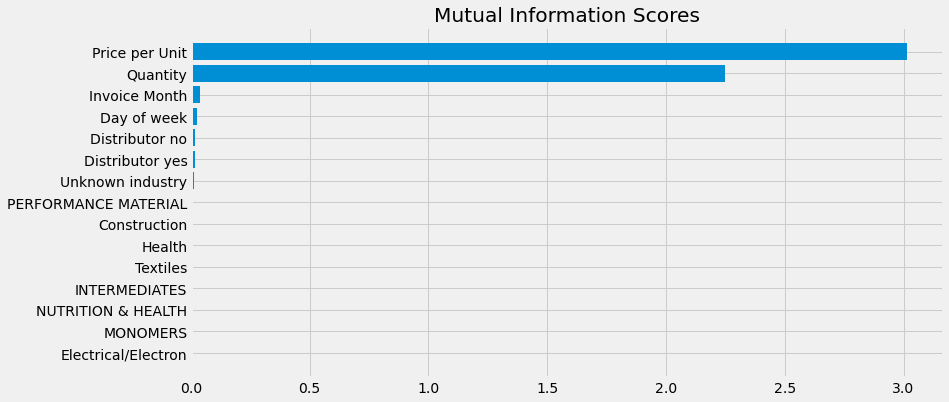

In [106]:
plot_mi_scores(scores)

As we assumed our label "Final Price" depends most on "Price per Unit" and "Quantity" which is logic. Also we can see that "Invoice MOnth" and "Day of week" have low correlation with "Final price" we can conclude that in a different part of year and week we have more sales then in other ones. 

### Searching best features with Random forest model

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
train_X,test_X,train_y,test_y=train_test_split(x,y,test_size=0.25)

In [109]:
from sklearn import metrics

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf=RandomForestRegressor()

In [112]:
model=rf.fit(train_X,train_y)

### Feature importance with RandomForrest

In [113]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

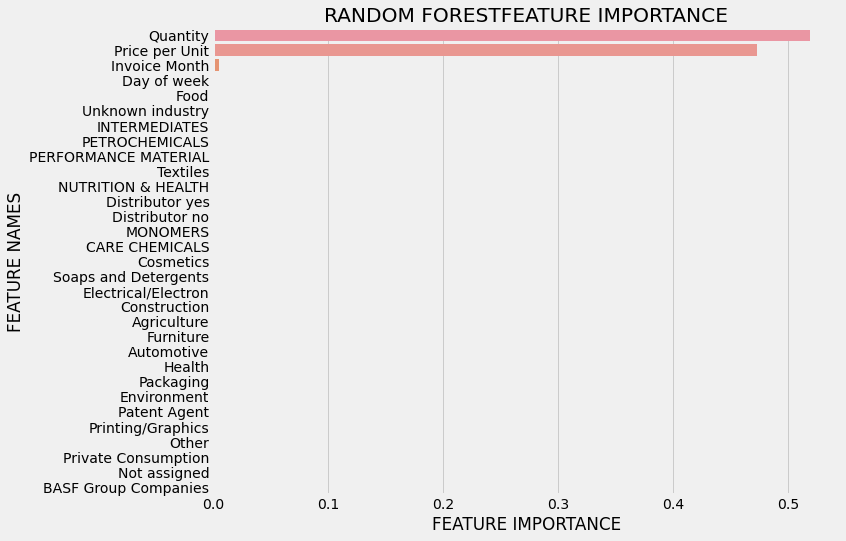

In [114]:
plot_feature_importance(model.feature_importances_,train_X.columns,'RANDOM FOREST')

Our RandomForrest model picked "Quantity" before "Price per Unit" but as we can see the reuslts are almost identical to those with mutual info.